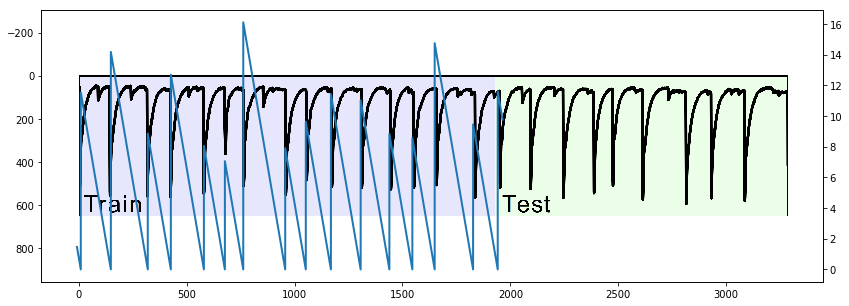

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load tgt info
tgt_i = np.load('../data/ttf_rec.npy')

f,a = plt.subplots(1,1,figsize=(14,5))

# Plot pic as background
img = mpimg.imread('../data/leak/screen1.png')
a.imshow(img)

# Plot target, after scaling
s = 1972 / tgt_i[-1,0]
a2 = a.twinx()
a2.plot(tgt_i[:,0] * s - 8, tgt_i[:,1], linewidth=2)

(-300, 300)

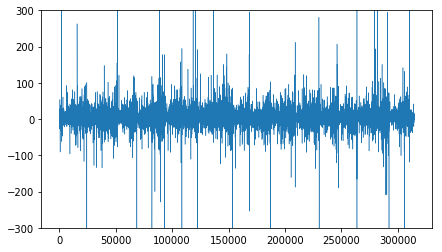

In [19]:
# Plot full train signal
sig = np.load('../data/signal.npy')[::2000]
f,a=plt.subplots(1,1,figsize=(7,4))
a.plot(np.arange(sig.size), sig, linewidth=0.5)
a.set_ylim(-300, 300)


In [80]:
sig[-20:]

array([ 8,  6,  7,  6,  2,  3,  4,  2,  2,  6,  6,  2,  3,  6,  5,  7,  9,
       10,  6,  5], dtype=int16)

In [75]:
# Load train, test and tgt
train_df = pd.read_hdf('../data/train_df.h5')
test_df = pd.read_hdf('../data/test_df.h5')
tgt = np.load('../data/target.npy')
test_df.shape, train_df.shape, tgt.shape

((2624, 150000), (4178, 150010), (4178,))

In [93]:
a = train_df.iloc[:7,:4]
b = pd.concat([a.iloc[-3:,:], a.iloc[:-3,:]], axis=0)
b.sort_index()

,0,1,2,3
0,6,8,5,8
1,5,5,6,4
2,5,7,3,5
3,4,6,6,4
4,2,1,4,3
5,8,2,-2,2
6,4,5,3,5


In [133]:
y_oof, y_tgt, y_test = np.load('../other/y_oof_.npy'), np.load('../other/y_tgt_.npy'), np.load('../other/y_pred_.npy')

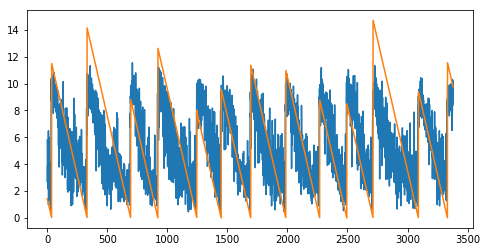

In [141]:
fig,axs =plt.subplots(1,1,figsize=(8,4))
rnd = np.arange(y_oof.size)
np.random.shuffle(rnd)
axs.plot(np.arange(y_oof.size), y_oof)
axs.plot(np.arange(y_oof.size), y_tgt)

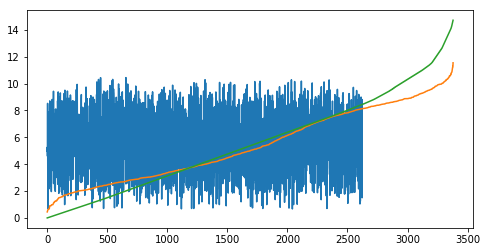

In [137]:
fig,axs =plt.subplots(1,1,figsize=(8,4))
axs.plot(np.arange(y_test.size), y_test)
axs.plot(np.arange(y_oof.size), np.sort(y_oof))
axs.plot(np.arange(y_oof.size), np.sort(y_tgt))

In [109]:
s='seg_0125d9'
sdf = pd.read_csv('../data/test/seg_0125d9.csv')
np.mean(np.abs(sdf.values))

5.19586

In [74]:
cks = np.array_split(np.arange(sig.size), 4194)

In [73]:
cks[1][[0,-1]]

array([150011, 300021])